In [1]:
from IPython.display import Image
from IPython.display import Latex

# How Autograd Works in PyTorch

In this tutorial you will learn:

1. What is Autograd?
2. What is Gradient Descent Optimization?
3. Working with Autograd
4. Optimization of linear model using Autograd

## What is Autograd?

Autograd is a package in PyTorch that allows automatic differentiation of all operations on tensors.
To understand the concept of automatic differentiation let's go back to how a neural network is optimized and trained.

Every neural network has an input layer, an output layer and a set of hidden layers.
The hidden layers are made up of neurons, which take in the weighted sum of inputs along with a bias and apply the activation function on this sum. For the first hidden layer, the inputs are in form of the training data available.

For every consequent hidden layer, the output of the previous is the input for the next one. The weights and biases in each neural network are determined by a cycle of forward and backward passes.

In the **forward pass** the current weights and biases are used to make a prediction using the neural network. For the first iteration weights and biases are usually taken to be 0.

Once we get the y_pred (predicted output), we calculate the error in comaprison to y (actual value).

In the **backward pass** the error from forward pass is used to update parameter values for each layer. 
A backward pass starts from the last layer and goes on to the second last layer, third last layer and so on.
Backward passes are also known as backpropagation.

Gradient Descent optimization is used to tweak the parameters and reduce the error in consequent iterations.

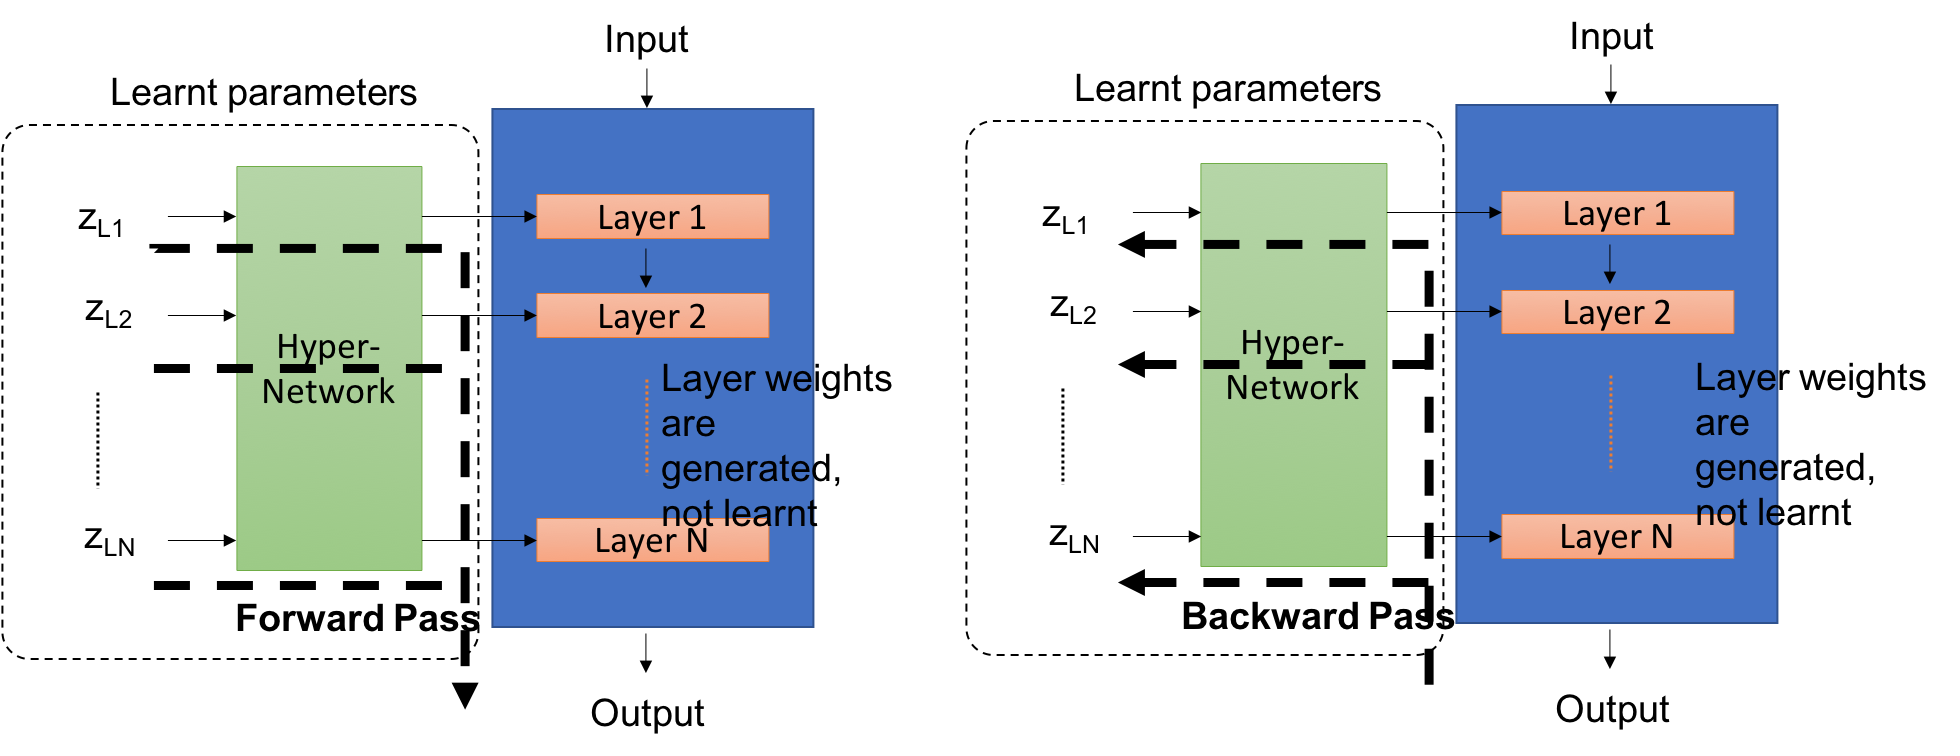

In [93]:
Image('forbackpasses.png')

## What is Gradient Descent Optimization

The parameters, that is the weights and biases in each layer are determined by performing gradient descent optimization the neural network. 

The quantity that gradient descent tries to minimize is the mean sqaure error, which is square of difference between y_predicted and y_actual.
The difference between y_predicted and y_actual is denoted by a loss function, theta.

$$ MSE = ( y_{pred} - y_{actual} ) ^ 2$$

$$ \theta = f(y_{pred} - y_{actual}) $$

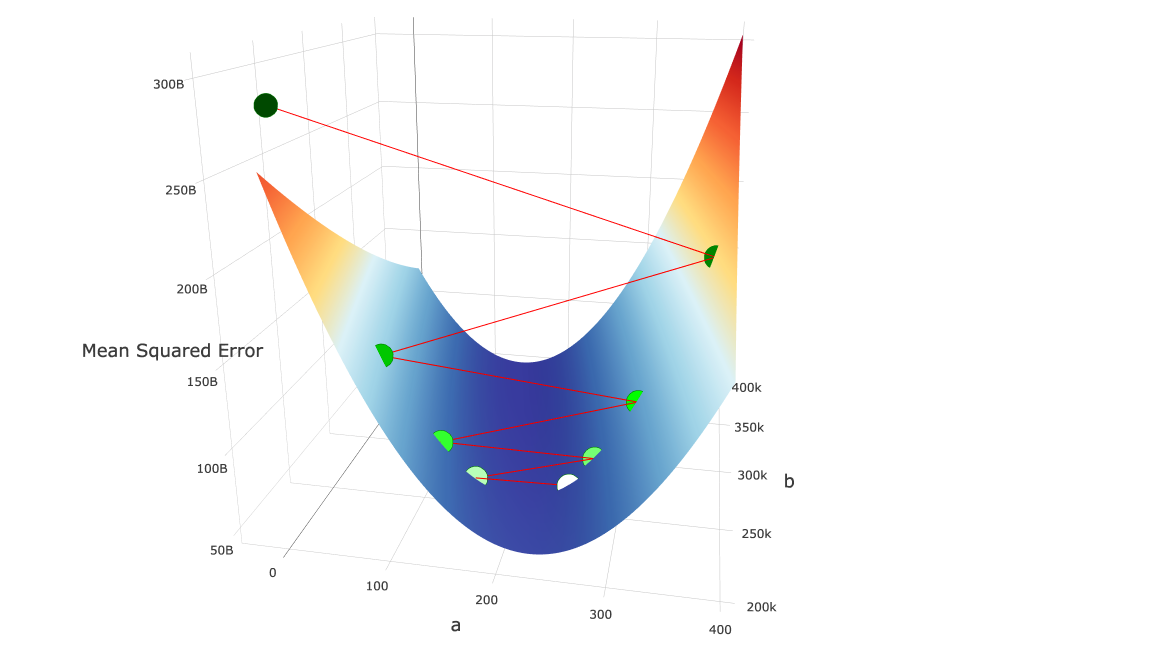

In [94]:
Image('graddes.png')

To do so, gradient descent involves finding the *gradient*, or the partial derivative of loss function theta w.r.t every parameter of neural network (weights and biases). 
Partial derivative w.r.t. to parameter P1 tells us how much does the loss change when we change the parameter P1, holding all other parameters constant.

$$ gradient(\theta) = \nabla\theta (W1, b1) = \partial \theta / \partial W1, \partial \theta / \partial b1  $$

Here W denotes weight and b denotes bias.
This expression is for a neural network with a single neuron. For a more complex neural network, you will need to calculate the gradients for all different weights and biases.

For every iteration of gradient descent, we try to minimize the 'gradient', or the partial derivative of loss fucntion w.r.t to all model parameters. This is done by changing the parameters accordingly for each iteration.
The parameters for which we reach the lowest value of loss are the optimized model parameters.

The mean squared error for this set of parameters will be minimum.

The process of updating parameter values after every iteration is done by a simple formula:

$$ parameter(t+1) = parameter(t) - \alpha * \partial \theta / \partial (parameter) $$

where alpha is the learning rate used to determine the size of steps we take while converging.

It is important to chose a learning rate that is not too large, because a large learning rate may prevent converging of values at all. The graph of MSE will keep jumping around between points and not converge to a single point.

## Automatic Differentiation

Now that we know about gradient descent optimization, the next step is actually calculating these gradients.

There are a few ways to calculate gradients or partial derivatives for a loss function:
1. Symbolic differentiation
2. Numeric differentiation
3. Automatic differentiation

Symbolic differentiation is hard to implement for a large number of parameters and similarly numeric differentiation is also not pissible for a large dataset or complex network.

Automatic differentiation involves complex math but can be easily implemented. It uses Taylor series to simplify the claulation of gradients. The actual math is too complex. 

To use automatic differentiation, we use the autograd library. This library is available in Tensorflow, PyTorch and most other deep learning frameworks. Lets see how it is implemented through code.

## Working with Autograd

Before starting with the code, it is important to note some of the most important functions and attributes associated with autograd in PyTorch. 

The first one is `requires_grad` attribute, which will tell you if autograd is active for a particular tensor or not. In other words, it tells you if the operations on this tensor are being tracked or not.
By default the value of this attribute is False, but it can be set to True by calling `requires_grad_()` function on the tensor.

The value of gradients of a tensor can be accessed by using `.grad` property and the gradient function can be accessed using `.grad_fn`.

Armed with this information, let's jump into implementing autograd on a few tensors. First, you will need to define a tensor.

In [3]:
import torch # Import library for PyTorch computations

tensor1 = torch.Tensor([[1, 2, 3], 
                       [4, 5, 6]])
tensor1

tensor([[1., 2., 3.],
        [4., 5., 6.]])

Let's check the value of `requires_grad`

In [4]:
tensor1.requires_grad

False

As expected, it is set to false by default. Let's enable tracking of operations on this tensor

In [5]:
tensor1.requires_grad_()

tensor([[1., 2., 3.],
        [4., 5., 6.]], requires_grad=True)

Let's check for gradients of this tensor.

In [7]:
print(tensor1.grad)

None


As we have performed no operation on this tensor so far, there are no gradients present. Similarly, there is no gradient function for this tensor either.

In [8]:
print(tensor1.grad_fn)

None


Let's define another tensor and perform some mathematical operations on both. 

In [18]:
tensor2 = torch.Tensor([[7, 8, 9], 
                       [10, 11, 12]])

output_tensor = (tensor1 +  tensor2).mean()

output_tensor

tensor(13., grad_fn=<MeanBackward0>)

You can see that now we have a gradient function specified for `output_tensor`. Note that we have performed two operations on the tensors, first addition and then mean. `grad_fn` only counts the last operation on the tensor.

Another thing worth noting is that `requires_grad` is True for `output_tensor`, even though for `tensor2` it is still False by default.

This is because the `requires_grad` property is 'contaigous', if any one of the origin tensors has this property set to True, the derived tensor will also have this property set to True.

In [19]:
print(output_tensor.requires_grad)

True


Even though we now have a gradient function, there are still no gradient values associated with `output_tensor`.

In [20]:
print(output_tensor.grad)

None


This is because we have not performed back propagation on the tensor yet. Let's perform backpropagation and check for the value of gradients.

In [21]:
output_tensor.backward()

The gradients are now available for the input tensor.

In [22]:
print(tensor1.grad)

tensor([[0.1667, 0.1667, 0.1667],
        [0.1667, 0.1667, 0.1667]])


Note that there will be no gradients for `tensor2` as we didnt set `requires_grad` to True during initialization.

In [23]:
print(tensor2.grad)

None


To turn off tracking for a new tensor derived from an origin tensor with `requires_grad` set to True, you can wrap the code in `torch.no_grad()`.

In [24]:
with torch.no_grad():
    
    new_tensor = tensor1 * 3
    
    print('new_tensor = ', new_tensor)
    
    print('requires_grad for tensor = ', tensor1.requires_grad)
    
    print('requires_grad for tensor = ', tensor2.requires_grad)
    
    print('requires_grad for new_tensor = ', new_tensor.requires_grad)

new_tensor =  tensor([[ 3.,  6.,  9.],
        [12., 15., 18.]])
requires_grad for tensor =  True
requires_grad for tensor =  False
requires_grad for new_tensor =  False


Here, the new tensor has `required_grad` set to False, even though it is derived from `tensor1`.

In case you want to remove a tensor from the computation graph, you can use `detach()`.

In [25]:
detached_tensor = tensor1.detach()

detached_tensor

tensor([[1., 2., 3.],
        [4., 5., 6.]])

Here we have created a `detached_tensor` that is the same as `tensor1`. But, for this tensor, `requires_grad` is set to false.

In [27]:
print(detached_tensor.grad)

None


Now that we are aware of the commonly used functions and properties, let's optimize a linear model using autograd.

## Optimization of Linear Model using Autograd



The first step in optimizing a linear model is to initialise tensors for number od data samples, input layer size, hidden layer size and output layer size.

For this example we will take the simplest case, where input layer size, hidden layer size and output layer size are all equal to 1.

In [78]:
import numpy as np 
import matplotlib.pyplot as plt
import random

# N is number of data samples, D_in is the input layer dimension, H is the hidden layer dimension
# D_out is the output layer dimension
N, D_in, H, D_out = 15, 1, 1, 1


# Create random input and output data
x = torch.randn(N, D_in) # x has a matrix of dimensions NxD_in = 15x1
y = torch.randn(N, D_out) # y has a matrix of dimensions NxD_out = 15x1

# Randomly initialize weights
w1 = torch.randn(D_in, H) # w1 has a matrix of dimensions D_inxH = 1x1
w2 = torch.randn(H, D_out) # w2 has a matrix of dimensions HxD_out = 1x1

Let's see how the data is distributed for a better understanding.

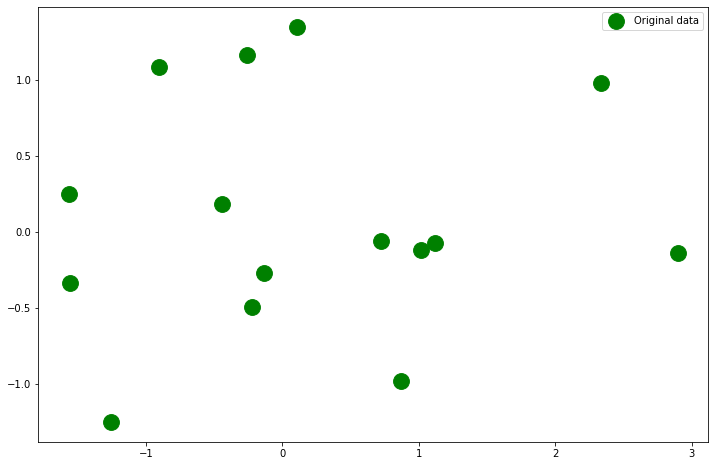

In [79]:
# Visualise the training data
plt.figure(figsize=(12, 8))

plt.scatter(x, y, label='Original data', s=250, c='g')

plt.legend()
plt.show()

Remember that while initialising the tensors x, y, w1 and w2 we didnt explicitly set `requires_grad` to be True. So by defualt it is false.

In [91]:
# By default requires_grad is false for both
print('requires_grad for X_train: ', x.requires_grad)
print('requires_grad for Y_train: ', y.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


The next step is to define a learning rate ofr carrying out gardient descent optimization using autograd. We will also enable tracking for w1 and w2 because we will be using backpropagation on these tensors to calculate gradients.

In [81]:
learning_rate = 1e-6

# Set requires_grad to True for both w1 and w2
w1.requires_grad_()
w2.requires_grad_()

tensor([[-0.4118]], requires_grad=True)

The main step is now to carry out the forward and the backward passes. During the forward pass we will also calculate the loss (MSE) so that we can carry out the optimization for this loss function.

In [82]:
for t in range(500):
    # Forward pass: compute predicted y using operations on Tensors
    y_pred = x.mm(w1).mm(w2)

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    
    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call w1.grad and w2.grad will be Tensors holding the gradient
    # of the loss with respect to w1 and w2 respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        # Manually zero the gradients after updating weights
        w1.grad.zero_()
        w2.grad.zero_()

Let's check the final values for w1 and w2.

In [83]:
# updated values of w1 and w2
print ('w1: ', w1)
print ('w2: ', w2)

w1:  tensor([[0.9918]], requires_grad=True)
w2:  tensor([[-0.4003]], requires_grad=True)


Now that we have the optimized values of both weights, let's see how out linear model has done in terms of fitting the training data.
We will convert both y_pred and x to numpy arrays for plotting the best fitting line in matplotlib.

In [89]:
# Convert predicted y tensor to numoy array for plotting line using matplotlib
predicted = y_pred.detach().numpy()
predicted

array([[-0.2867829 ],
       [-0.44372976],
       [ 0.6219225 ],
       [-1.1505502 ],
       [-0.40456986],
       [-0.04319627],
       [ 0.05390909],
       [ 0.08884583],
       [ 0.3581192 ],
       [ 0.49868846],
       [ 0.6182286 ],
       [-0.9265225 ],
       [-0.34479266],
       [ 0.10238449],
       [ 0.17652887]], dtype=float32)

Similar operation for x:

In [86]:
x_train = x.numpy()
x_train

array([[ 0.7222517 ],
       [ 1.1175164 ],
       [-1.566288  ],
       [ 2.8976169 ],
       [ 1.0188937 ],
       [ 0.10878815],
       [-0.13576798],
       [-0.22375484],
       [-0.9019095 ],
       [-1.2559278 ],
       [-1.5569851 ],
       [ 2.3334115 ],
       [ 0.8683471 ],
       [-0.25785142],
       [-0.44458118]], dtype=float32)

Now let's see how our model has performed.

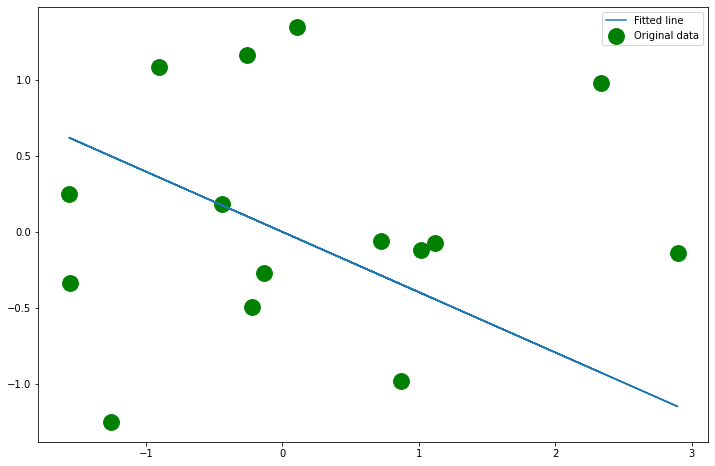

In [87]:
plt.figure(figsize=(12, 8))

plt.scatter(x, y, label = 'Original data', s=250, c='g') # Distribution of training data

plt.plot(x_train, predicted, label = 'Fitted line ') # Best fitting line using predicted values of y and x

plt.legend() 

plt.show()

You can see that our model has done a pretty decent job at fitting the training data. Note that the fit of this line can be improved by increasing the number of iterations of forward and backward passes.

## References

1. Foundations of PyTorch by Janani Ravi (Pluralsight)
2. PyTorch official [documentation](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html)